# More Classification Problems #

1. Consider the dataset 01-18train.csv (on the github page) consisting of $(x,y)$ pairs, where $x$ is a number and $y$ is either 0 or 1.

+ Produce a (labelled) side-by-side histogram of the two populations represented by the data.  Use an [alpha channel](https://stackoverflow.com/questions/69657280/how-to-fix-transparency-overlaps-in-matplotlib-when-plotting-multiple-figures) to make one histogram partially transparent.
+ Produce a (labelled) scatter plot of the data (with the first variable on the x-axis and the second variable on the y-axis).
+ Use this data to *train* a Bayesian classification model using the myBayes() class given below. (**Warning:** I wrote this myself; it has several problems but generally seems to work.) 
+ The dataset 01-18test.csv has some additional points from the same distribution.  What is the *accuracy* of the model on these new data points?   In other words, what percentage of this data is correctly classified? 

2. On the [book's github site](https://github.com/rasbt/machine-learning-book) in Chapter 3 is a LogisticRegressionGD() class, which implements a logistic regression classifier which makes use of gradient descent.

+ Use this to produce a logistic regression model for the training data above, and use this model to find the number of innacuracies on the test data as before.
+ Add a new method to the class called findweights() which displays the weights an bias for the model.
+ Use your answer to the previous question to plot the appropriate sigmoid function over the scatter plot you produced in Question 1

3. (From Friday's material.)

+ Make a function myKNN(X, y, pt, k), which trains and implements a k-nearest neighborhood classifier using data (X,y) and produces as output the classification for the point "pt".
+ Use the dataset [01-19data.csv](https://github.com/aleahy-work/CS-STAT323-W24/tree/main/Assns) on the github page to 'train' your model and find the classification for the point (0,1) with $k = 5$. 
+ Modify the myKNN(X, y, pt, k) function so that it produces a scatter plot for the data (X,y) **and** adds the point pt to the scatter plot in a vivid red color.  Test it out with your point above. 


In [1]:
class myBayes():
    import scipy.stats as stats
    
    def __init__(self):
        import scipy.stats as stats
        import numpy as np

    def fit(self, X, y):
        self.classes = np.unique(np.array(y)) # list of classes
        if (self.classes.min() != 0) | (self.classes.max() != self.classes.shape[0] - 1):
            return print("Classes must be np.array[0,...n]")
        self.py = np.bincount(y.astype('int8'))/y.size  # compute the priors P(y_k) for each class
        self.dists = []
        for i in np.unique(np.array(y)):
            thisx = X[y == i]
            thismean = np.mean(thisx, axis=0)
            thiscov = np.cov(thisx.T)
            self.dists.append(stats.multivariate_normal(thismean, thiscov))
        return self

    def predict(self,X):
        myprobs = []
        for i in range(self.classes.shape[0]):
            myprobs.append(self.py[i] * np.array(self.dists[i].pdf(np.array(X))))
        return  np.argmax(np.array(myprobs).T, axis=1)
    

In [2]:
import numpy as np
import scipy.stats as stats

In [4]:
class LogisticRegressionGD:
    """Gradient descent-based logistic regression classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after training.
    b_ : Scalar
      Bias unit after fitting.
    losses_ : list
       Log loss function values in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : Instance of LogisticRegressionGD

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)
        self.losses_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_ += self.eta * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * errors.mean()
            loss = (-y.dot(np.log(output)) - (1 - y).dot(np.log(1 - output))) / X.shape[0]
            self.losses_.append(loss)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def activation(self, z):
        """Compute logistic sigmoid activation"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

## Problem 1 ##

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
mydata = np.genfromtxt('https://raw.githubusercontent.com/aleahy-work/CS-STAT323-W24/main/Assns/01-18train.csv', delimiter=',')

In [18]:
mydata[:5]

array([[-0.16870724,  0.        ],
       [ 1.58280044,  1.        ],
       [ 1.2576642 ,  1.        ],
       [-2.66692079,  0.        ],
       [ 1.28179027,  1.        ]])

### Part 1 ###

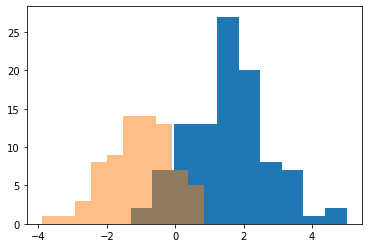

In [19]:
plt.hist(mydata[mydata[:,1] == 1,0])
plt.hist(mydata[mydata[:,1] == 0,0],alpha=.5)
plt.show()

### Part 2 ###

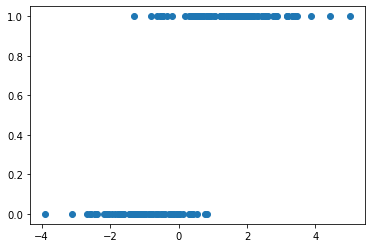

In [21]:
plt.scatter(mydata[:,0], mydata[:,1])
plt.show()

### Part 3 ###

In [22]:
import scipy.stats as stats

class myBayes():
    
    def __init__(self):
        import scipy.stats as stats
        import numpy as np

    def fit(self, X, y):
        self.classes = np.unique(np.array(y)) # list of classes
        if (self.classes.min() != 0) | (self.classes.max() != self.classes.shape[0] - 1):
            return print("Classes must be np.array[0,...n]")
        self.py = np.bincount(y.astype('int8'))/y.size  # compute the priors P(y_k) for each class
        self.dists = []
        for i in np.unique(np.array(y)):
            thisx = X[y == i]
            thismean = np.mean(thisx, axis=0)
            thiscov = np.cov(thisx.T)
            self.dists.append(stats.multivariate_normal(thismean, thiscov))
        return self

    def predict(self,X):
        myprobs = []
        for i in range(self.classes.shape[0]):
            myprobs.append(self.py[i] * np.array(self.dists[i].pdf(np.array(X))))
        return  np.argmax(np.array(myprobs).T, axis=1)
    

In [23]:
myownbayes = myBayes()

In [24]:
mymodel = myownbayes.fit(mydata[:,0], mydata[:,1])

### Part 4 ###

In [25]:
mytest = np.genfromtxt('https://raw.githubusercontent.com/aleahy-work/CS-STAT323-W24/main/Assns/01-18test.csv', delimiter=',')

In [26]:
mypredict = mymodel.predict(mytest[:,0])

In [27]:
mypredict[:5]

array([1, 0, 0, 0, 1])

Make a homemade accuracy measure (Yes, SKLearn can do this itself.)

In [29]:
len(mypredict - mytest[:,1])

70

In [30]:
np.count_nonzero(mypredict - mytest[:,1])

5

Then just compute the ratio to find the accuracy measure:

In [33]:
1- np.count_nonzero(mypredict - mytest[:,1])/len(mypredict - mytest[:,1]) # 93% accuracy

0.9285714285714286

## Problem 2 ##

### Part 1 ###

In [34]:
class LogisticRegressionGD:
    """Gradient descent-based logistic regression classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after training.
    b_ : Scalar
      Bias unit after fitting.
    losses_ : list
       Log loss function values in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : Instance of LogisticRegressionGD

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)
        self.losses_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_ += self.eta * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * errors.mean()
            loss = (-y.dot(np.log(output)) - (1 - y).dot(np.log(1 - output))) / X.shape[0]
            self.losses_.append(loss)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def activation(self, z):
        """Compute logistic sigmoid activation"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

In [59]:
mylog = LogisticRegressionGD()

#### Note: ####

Note the shape of X is [n_examples, n_features] and that y is just an array in the .fit() method above.  So my mydata above has to be reshaped.  See the next few lines and not the subtle differences.

In [44]:
mydata[:,0].shape # This shape is incorrect for the input to the model

(175,)

In [51]:
mydata[:,0:1].shape # This is the correct shape for the input to the model

(175, 1)

In [53]:
mydata[:,1].shape  # this is the correct shape for the output

(175,)

In [60]:
mymodel = mylog.fit(mydata[:,0:1], mydata[:,1])  # Works

In [61]:
mypredict = mymodel.predict(mytest[:,0:1])

In [62]:
1- np.count_nonzero(mypredict - mytest[:,1])/len(mypredict - mytest[:,1]) # 93% accuracy

0.9285714285714286

### Part 2 ##

In [58]:
class LogisticRegressionGD:
    """Gradient descent-based logistic regression classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after training.
    b_ : Scalar
      Bias unit after fitting.
    losses_ : list
       Log loss function values in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : Instance of LogisticRegressionGD

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)
        self.losses_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_ += self.eta * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * errors.mean()
            loss = (-y.dot(np.log(output)) - (1 - y).dot(np.log(1 - output))) / X.shape[0]
            self.losses_.append(loss)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def activation(self, z):
        """Compute logistic sigmoid activation"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

    def findweights(self):
        return self.w_, self.b_

In [63]:
w, b = mylog.findweights()

In [64]:
w

array([0.28924181])

In [65]:
b

0.025843613311529828

### Part 3 ###

In [74]:
def mylogitfctn(x):
   return 1/(1 + np.exp(-(0.28924181*x + 0.025843613311529828)))

In [82]:
myx = np.arange(-7,7,.1)

In [83]:
myy = mylogitfctn(myx)

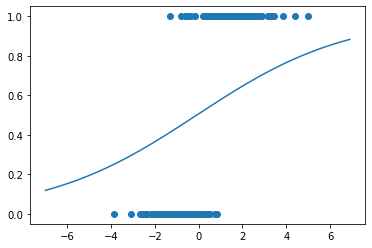

In [84]:
plt.scatter(mydata[:,0], mydata[:,1])
plt.plot(myx, myy)
plt.show()

## Problem 3 ##

In [93]:
import numpy.linalg as LA

def myknn(X,y,pt,k):
    mydistanc = np.argpartition(LA.norm(pt - X, axis=1),k)
    indx, count = np.unique(y[mydistanc[:k]], return_counts = True)
    plt.scatter(X[:,0], X[:,1], c=y)
    plt.scatter(pt[0], pt[1], c="red")
    plt.show()
    return indx[np.argmax(count)]

In [94]:
mydata = np.genfromtxt('https://raw.githubusercontent.com/aleahy-work/CS-STAT323-W24/main/Assns/01-19data.csv', delimiter=',')

In [95]:
mydata[:5]

array([[ 5.24607175,  1.03490857,  1.        ],
       [-5.05241673, -0.2116077 ,  0.        ],
       [-0.9571638 ,  1.75115351,  1.        ],
       [-2.4209439 , -1.60546925,  0.        ],
       [-0.53618997, -1.02552156,  0.        ]])

In [96]:
X = mydata[:,:2]

In [97]:
y = mydata[:,2]

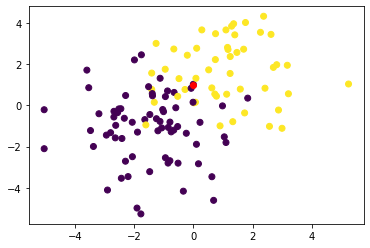

1.0

In [99]:
myknn(X,y,np.array([0,1]), 5)